**Proyek Akhir: Image Classification Model Deployment**

Oleh: Firsti Eliora

In [1]:
!pip install opendatasets
import opendatasets as od
import pandas as pd
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard
from keras.callbacks import EarlyStopping, ModelCheckpoint


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
od.download(
    "https://www.kaggle.com/datasets/utkarshsaxenadn/car-vs-bike-classification-dataset"
)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: aliffachriansyah
Your Kaggle Key: ··········


100%|██████████| 103M/103M [00:05<00:00, 20.1MB/s]


In [3]:
base_dir = '/content/car-vs-bike-classification-dataset/Car-Bike-Dataset'
os.listdir(base_dir)

['Car', 'Bike']

In [4]:
# Defining Bike and Car image training folder 
bike = os.path.join(base_dir, 'Bike')
car = os.path.join(base_dir, 'Car')

In [5]:
# Melihat jumlah dataset
print("Jumlah dataset bike :",len(os.listdir(bike)))
print("jumlah dataset car :",len(os.listdir(car)))

Jumlah dataset bike : 2000
jumlah dataset car : 2000


In [6]:
# Grouping data into Training Data and Validation Data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=90,
                    horizontal_flip=True,
                    vertical_flip=True,
                    validation_split = 0.2
                    )


In [7]:
# Data labeling using ImageDataGenerator by folder
train_generator = train_datagen.flow_from_directory(
        base_dir,               
        target_size=(150, 150),  # mengubah resolusi menjadi 150x150 pixel
        # menggunakan caterogical karena lebih dari karena kasus klasikfikasi 3 kelas
        class_mode='binary',
        shuffle=True,
        batch_size = 32,
        subset='training')

validation_generator = train_datagen.flow_from_directory(
        base_dir,
        target_size=(150, 150), # mengubah resolusi menjadi 150x150 pixel
        # menggunakan caterogical karena lebih dari karena kasus klasifikasi 3 kelas
        class_mode='binary',
        shuffle=True,
        batch_size = 32,
        subset='validation')

Found 3200 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [8]:
class myCallback(tf.keras.callbacks.Callback):
  # Define the correct function signature for on_epoch_end
  def on_epoch_end(self, epoch, logs={}):
    if ((logs.get('accuracy') > 0.90)):
      print("\nReached 90% accuracy so cancelling training!") 
      # Stop training once the above condition is met
      self.model.stop_training = True
callbacks = myCallback()

In [13]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 128)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 256)       295168    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 256)     

In [15]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [16]:
# latih model dengan model.fit 
result = model.fit(
    train_generator,
    steps_per_epoch= 25,  # berapa batch yang akan dieksekusi pada setiap epoch
    epochs=100, # tambahkan epochs jika akurasi model belum optimal
    validation_data=
    validation_generator, # menampilkan akurasi pengujian data validasi
    validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
    verbose=2, callbacks=[callbacks])
    

Epoch 1/100
25/25 - 8s - loss: 0.8879 - accuracy: 0.5075 - val_loss: 0.6885 - val_accuracy: 0.5188 - 8s/epoch - 332ms/step
Epoch 2/100
25/25 - 10s - loss: 0.6802 - accuracy: 0.6100 - val_loss: 0.6358 - val_accuracy: 0.6500 - 10s/epoch - 388ms/step
Epoch 3/100
25/25 - 7s - loss: 0.6014 - accuracy: 0.6888 - val_loss: 0.6065 - val_accuracy: 0.6625 - 7s/epoch - 271ms/step
Epoch 4/100
25/25 - 9s - loss: 0.5452 - accuracy: 0.7375 - val_loss: 0.7475 - val_accuracy: 0.6750 - 9s/epoch - 367ms/step
Epoch 5/100
25/25 - 7s - loss: 0.5759 - accuracy: 0.7325 - val_loss: 0.7426 - val_accuracy: 0.6812 - 7s/epoch - 266ms/step
Epoch 6/100
25/25 - 8s - loss: 0.5828 - accuracy: 0.7125 - val_loss: 0.5442 - val_accuracy: 0.7688 - 8s/epoch - 311ms/step
Epoch 7/100
25/25 - 7s - loss: 0.5397 - accuracy: 0.7375 - val_loss: 0.5666 - val_accuracy: 0.7188 - 7s/epoch - 296ms/step
Epoch 8/100
25/25 - 7s - loss: 0.5044 - accuracy: 0.7550 - val_loss: 0.4840 - val_accuracy: 0.7437 - 7s/epoch - 278ms/step
Epoch 9/100
25

Saving Bike (1).png to Bike (1) (1).png
1/1 [==============================] - 0s 18ms/step
Bike (1).png
Ini adalah Bike


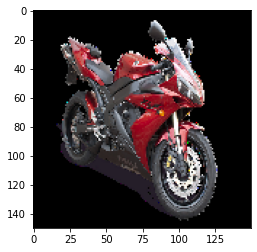

In [23]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)  
  print(fn)
  if classes[0][0]==1:
    print('Ini adalah Bike')
  else:
   print('Ini adalah Car')

In [18]:
classes

array([[1.]], dtype=float32)

In [19]:
print(train_generator.class_indices) 

{'Bike': 0, 'Car': 1}


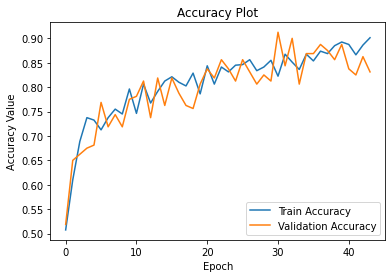

In [20]:
plt.plot(result.history['accuracy'], label='Train Accuracy')
plt.plot(result.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.ylabel('Accuracy Value')
plt.xlabel('Epoch') 
plt.legend(loc="lower right")
plt.show()

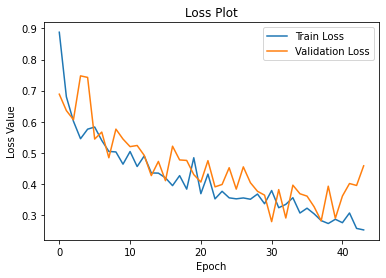

In [21]:
plt.plot(result.history['loss'], label='Train Loss')
plt.plot(result.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.ylabel('Loss Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

In [24]:
#Convert to tf lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

#save 
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)